# Principal Component Analysis with Cancer Data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
data = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [4]:
data.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
data.shape
data.size
data.info()

(699, 11)

7689

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
data.describe()
data.dtypes
data.columns

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set
data.isnull().sum()
data[~ data.applymap(np.isreal).all(1)]
# Check for missing value in any other column

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column
data['Bare Nuclei'].unique()
# Get count of rows having ?
data[data["Bare Nuclei"] == '?'] .count()
data["Bare Nuclei"].value_counts()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [11]:
data["Bare Nuclei"] = data["Bare Nuclei"].replace('?',np.NaN)

In [12]:
data.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
from sklearn.preprocessing import Imputer
missing = Imputer(missing_values='NaN',strategy= 'mean')

C:\Users\JD\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
data_df  = missing.fit_transform(data)

In [15]:
data_df = pd.DataFrame(data_df)
data_df.head(2)
data_df.isnull().sum()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [16]:
data_df.columns = ['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class']

In [17]:
data_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0


In [18]:
data_df['Bare Nuclei'] = data_df['Bare Nuclei'].astype('int64')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
col = list(data_df.columns)
for i in col:
    data_df[i] = data_df[i].astype('int64')

In [20]:
data_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [21]:
data_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [22]:
data_df.corr(method='pearson', min_periods=1)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.097440,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.097440,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170


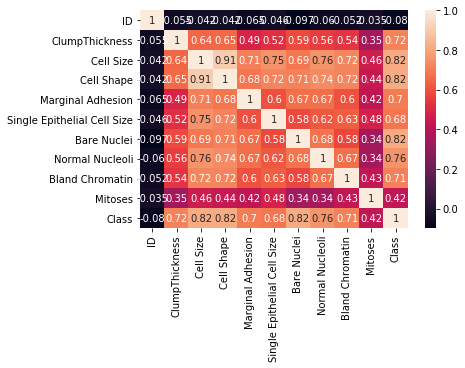

In [23]:
sns.heatmap(data = data_df.corr(method='pearson', min_periods=1),annot=True,)

C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JD\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


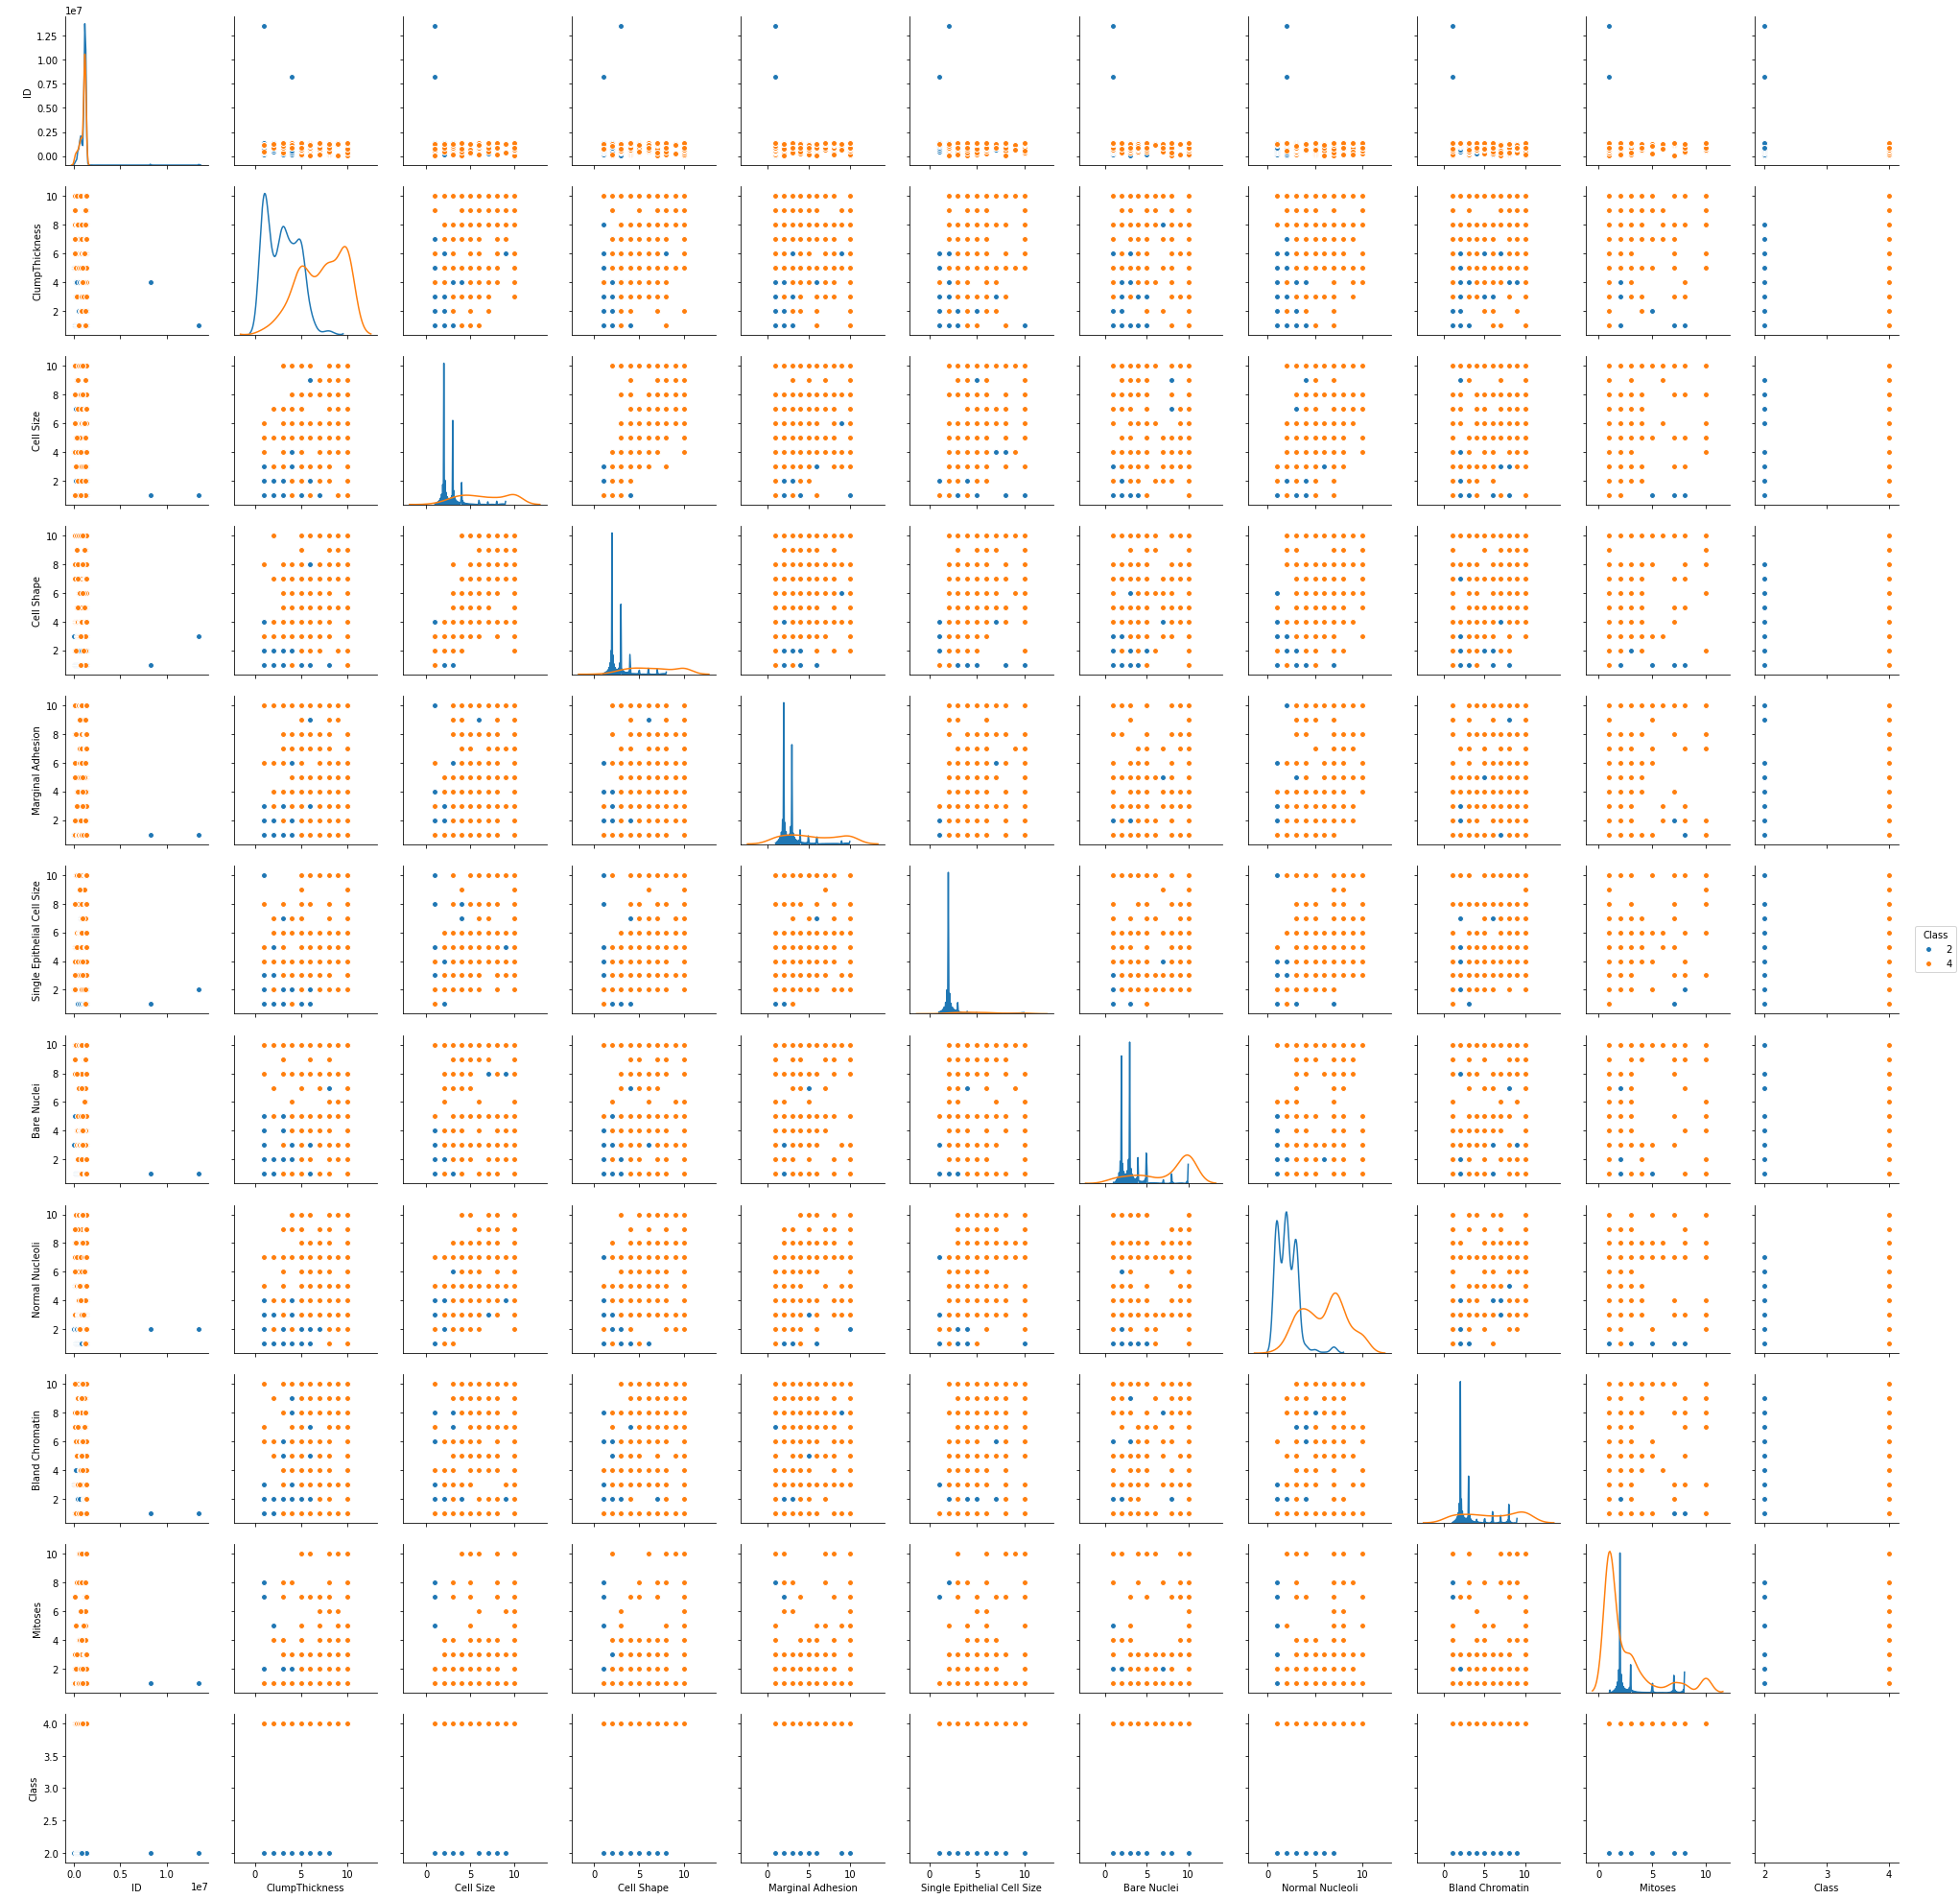

In [24]:
sns.pairplot(data = data_df,diag_kind='kde',hue ='Class' )

In [25]:
# Check for correlation of variable

In [26]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [27]:
#Let us check for pair plots

In [28]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [29]:
data_df = data_df.drop(columns=['ID'])

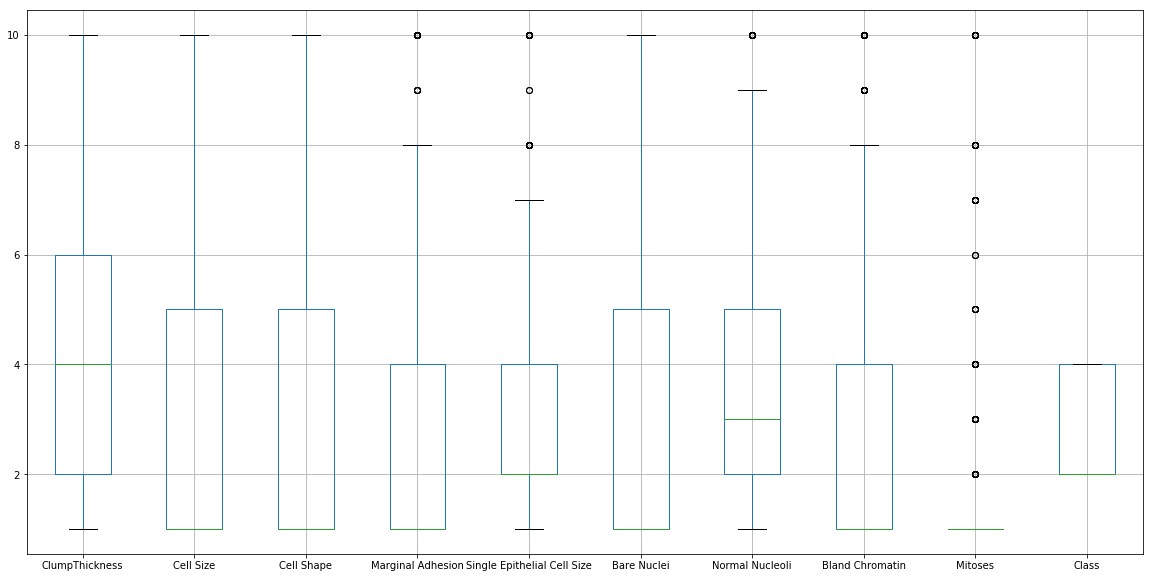

In [30]:
data_df.boxplot(figsize=(20,10))

In [31]:

data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.532189,3.602774,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [32]:
# We could see most of the outliers are now removed.

In [33]:
pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])
pd.crosstab(data_df['Bland Chromatin'], data_df['Class'])
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [34]:
data_df['Marginal Adhesion'] = np.where(data_df['Marginal Adhesion'] >4, 4, data_df['Marginal Adhesion'])
data_df['Single Epithelial Cell Size'] = np.where(data_df['Single Epithelial Cell Size'] >6, 6, data_df['Single Epithelial Cell Size'])
data_df['Normal Nucleoli'] = np.where(data_df['Normal Nucleoli'] >6, 6, data_df['Normal Nucleoli'])
data_df['Mitoses'] = np.where(data_df['Mitoses'] >3, 3, data_df['Mitoses'])
data_df['Bland Chromatin'] = np.where(data_df['Bland Chromatin'] >5, 5, data_df['Bland Chromatin'])

In [35]:
pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])
pd.crosstab(data_df['Single Epithelial Cell Size'], data_df['Class'])
pd.crosstab(data_df['Normal Nucleoli'], data_df['Class'])
pd.crosstab(data_df['Bland Chromatin'], data_df['Class'])
pd.crosstab(data_df['Mitoses'], data_df['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,15,161


Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,8,99


Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,8,134


Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,13,145


Class,2,4
Mitoses,,
1,445,134
2,8,27
3,5,80


In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_df_scale = scale.fit_transform(data_df)

C:\Users\JD\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\JD\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
data_df_scale = pd.DataFrame(data_df_scale)

In [38]:
data_df_scale.columns = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class']

In [39]:
data_df_scale.head(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.206936,-0.699995,-0.743299,-0.776593,-0.603991,-0.703348,-0.051352,-0.691425,-0.436962,-0.725397
1,0.206936,0.283845,0.266875,1.543230,1.931684,1.796516,-0.051352,-0.094751,-0.436962,-0.725397


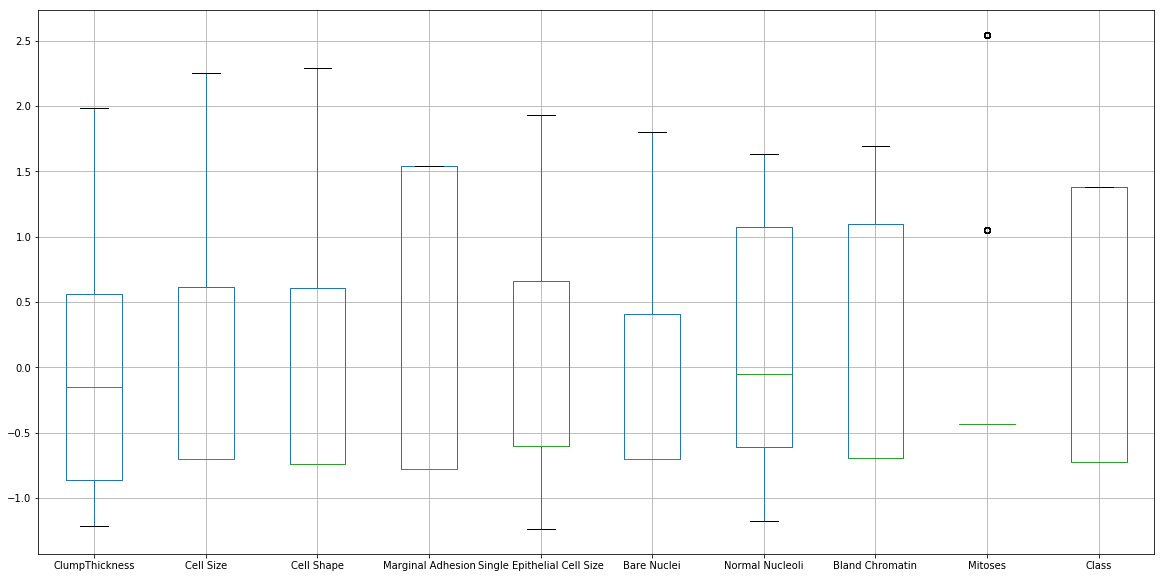

In [40]:
data_df_scale.boxplot(figsize=(20,10))

# Q6 Create a covariance matrix for identifying Principal components

In [41]:
cov_mat = np.cov(data_df_scale.T)
cov_mat

array([[1.00143266, 0.64583645, 0.65552689, 0.55151351, 0.56413691,
        0.58927575, 0.57835893, 0.56679455, 0.42662567, 0.71702715],
       [0.64583645, 1.00143266, 0.90818117, 0.71521785, 0.79059498,
        0.68840199, 0.73714735, 0.73114712, 0.51272252, 0.81907552],
       [0.65552689, 0.90818117, 1.00143266, 0.69734899, 0.76233939,
        0.7108287 , 0.72206434, 0.72305564, 0.48335106, 0.820107  ],
       [0.55151351, 0.71521785, 0.69734899, 1.00143266, 0.66305424,
        0.69002674, 0.67025804, 0.65607922, 0.42440609, 0.73646839],
       [0.56413691, 0.79059498, 0.76233939, 0.66305424, 1.00143266,
        0.64744645, 0.6667727 , 0.70621971, 0.49887609, 0.74975332],
       [0.58927575, 0.68840199, 0.7108287 , 0.69002674, 0.64744645,
        1.00143266, 0.70235998, 0.63656181, 0.45054978, 0.81861341],
       [0.57835893, 0.73714735, 0.72206434, 0.67025804, 0.6667727 ,
        0.70235998, 1.00143266, 0.68935702, 0.41450493, 0.77924187],
       [0.56679455, 0.73114712, 0.7230556

In [42]:
# PCA
# Step 1 - Create covariance matrix


# Q7 Identify eigen values and eigen vector

In [43]:
# Step 2- Get eigen values and eigen vector

In [44]:
eign_val, eign_vect = np.linalg.eig(cov_mat)

eign_vect
print ('-'*100)
eign_val

array([[ 0.28539859,  0.00392257,  0.8842458 , -0.02335878, -0.1649636 ,
         0.16596341,  0.16569051, -0.01435903,  0.23103677, -0.01736735],
       [ 0.34594868,  0.04103236, -0.0984155 , -0.73533202, -0.02518996,
         0.35414668, -0.29148771, -0.19257409, -0.21488685, -0.18427273],
       [ 0.34325137,  0.08441032, -0.03504917,  0.65860223, -0.15548252,
         0.32706856, -0.43805061, -0.1030808 , -0.27600562, -0.17385713],
       [ 0.31087398,  0.16754601, -0.20242256,  0.04401783, -0.00706605,
        -0.35410655,  0.02133503, -0.2420733 ,  0.56845749, -0.56985373],
       [ 0.32219895, -0.02914027, -0.28356776,  0.07095084, -0.0308393 ,
         0.3715537 ,  0.72517157,  0.32168812, -0.1070741 , -0.17340373],
       [ 0.31690231,  0.13821791,  0.06123281, -0.10721265, -0.35472353,
        -0.5995597 , -0.08289933,  0.48269183, -0.37368618, -0.02047067],
       [ 0.31873963,  0.21364349, -0.09829259,  0.04581841, -0.10804306,
        -0.20259047,  0.30336115, -0.63348609

----------------------------------------------------------------------------------------------------


array([6.97264418, 0.68632302, 0.50338488, 0.08838639, 0.12617549,
       0.43412687, 0.25236119, 0.28302498, 0.32527776, 0.34262188])

# Q8 Find variance and cumulative variance by each eigen vector

In [47]:
total = sum(eign_val)
var_exp = [( i /total ) * 100 for i in sorted(eign_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [49]:
cum_var = np.cumsum(var_exp)
cum_var

array([ 69.62669014,  76.48010171,  81.50674898,  85.84180697,
        89.26312414,  92.51124831,  95.33744912,  97.85745069,
        99.11740054, 100.        ])

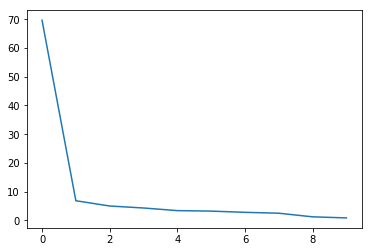

In [51]:
plt.plot(var_exp)

<Figure size 720x360 with 0 Axes>

<BarContainer object of 10 artists>

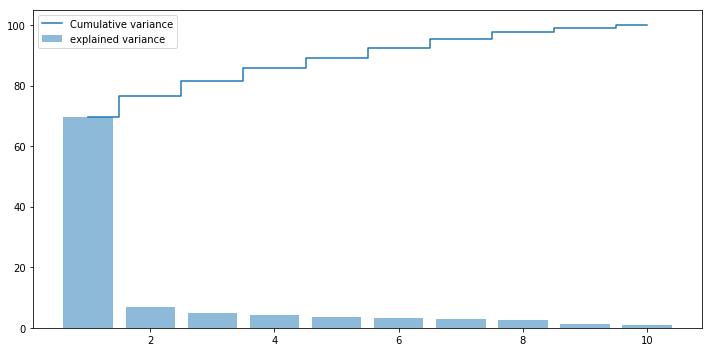

In [53]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eign_val.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'explained variance')
plt.step(range(1, eign_val.size + 1), cum_var, where='mid', label = 'Cumulative variance')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [56]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_df_scale)
data_reduced.transpose()
pca.components_

array([[-1.68989073e+00,  1.51714105e+00, -1.80472879e+00, ...,
         4.22554222e+00,  2.80784073e+00,  3.14172197e+00],
       [-6.44336175e-02, -8.38082814e-01, -1.00037226e-01, ...,
         2.45182416e-01, -1.24344837e+00, -1.33251577e+00],
       [ 6.58900006e-01, -6.51253210e-01,  4.73851179e-02, ...,
        -1.26145151e+00, -1.01958658e+00, -1.06356547e+00],
       [ 8.98559112e-02, -5.12576132e-01, -1.94646400e-01, ...,
         1.68438718e+00,  6.82860506e-02,  2.60658506e-01],
       [ 3.50697239e-01, -1.48919467e+00,  3.57355983e-01, ...,
         2.99251474e-01,  5.60444688e-01, -2.10762134e-03],
       [-3.02953729e-03,  4.15596529e-02,  2.64987772e-01, ...,
         2.88410573e-01, -7.42413202e-01, -5.22777535e-02]])

array([[ 0.28539859,  0.34594868,  0.34325137,  0.31087398,  0.32219895,
         0.31690231,  0.31873963,  0.31768216,  0.23001762,  0.35318376],
       [-0.00392257, -0.04103236, -0.08441032, -0.16754601,  0.02914027,
        -0.13821791, -0.21364349,  0.02061782,  0.94451226, -0.07056065],
       [ 0.8842458 , -0.0984155 , -0.03504917, -0.20242256, -0.28356776,
         0.06123281, -0.09829259, -0.23861553, -0.02994223,  0.12068529],
       [ 0.16596341,  0.35414668,  0.32706856, -0.35410655,  0.3715537 ,
        -0.5995597 , -0.20259047,  0.1623854 , -0.17628591, -0.13659559],
       [-0.01736735, -0.18427273, -0.17385713, -0.56985373, -0.17340373,
        -0.02047067,  0.51703378,  0.55282866, -0.01111287,  0.08501473],
       [-0.23103677,  0.21488685,  0.27600562, -0.56845749,  0.1070741 ,
         0.37368618,  0.16621673, -0.55740208,  0.04082966,  0.10012127]])

# Q10 Find correlation between components and features

In [58]:
df_com = pd.DataFrame(pca.components_,columns=list(data_df_scale))
df_com.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.285399,0.345949,0.343251,0.310874,0.322199,0.316902,0.318740,0.317682,0.230018,0.353184
1,-0.003923,-0.041032,-0.084410,-0.167546,0.029140,-0.138218,-0.213643,0.020618,0.944512,-0.070561
2,0.884246,-0.098416,-0.035049,-0.202423,-0.283568,0.061233,-0.098293,-0.238616,-0.029942,0.120685
3,0.165963,0.354147,0.327069,-0.354107,0.371554,-0.599560,-0.202590,0.162385,-0.176286,-0.136596
4,-0.017367,-0.184273,-0.173857,-0.569854,-0.173404,-0.020471,0.517034,0.552829,-0.011113,0.085015


<Figure size 864x432 with 0 Axes>

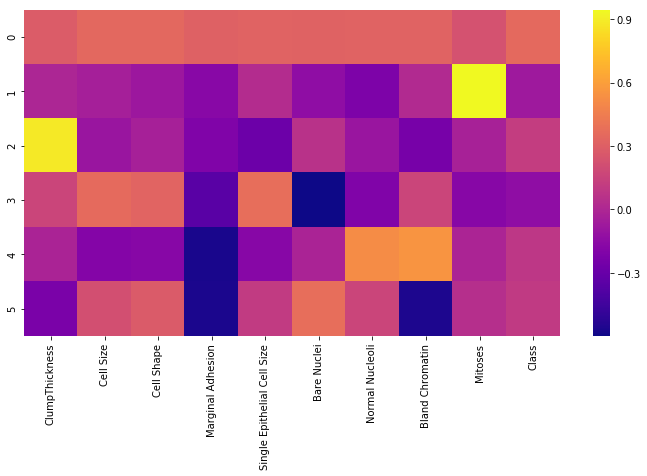

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(df_com,cmap='plasma',)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.